# Introduction to Qiskit

Let's start by importin the python package `qiskit`. If you have not installed it, or you are using this notebook from Googl Scholar, run the following cell:

In [ ]:
!pip install qiskit

If you already have it, you can directly run

In [1]:
from qiskit import *

## 1 - Single Qubits

Let's start with the most basic features. The main tool of Qiskit are the quantum circuits. To define a circuit of a single qubit, we just need to do:

In [2]:
qubit = QuantumCircuit(1)

We can draw the circuits we build using 

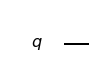

In [3]:
qubit.draw(output='mpl')

All qubits in Qiskit are initialized in the state $|0\rangle$. To check whether that's true or not we will measure it. To do so, we first need to introduce a classical register, where we will store the information of the measurement. 

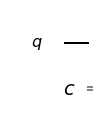

In [4]:
qubit = QuantumCircuit(1, 1) # one qubit, one classical register
qubit.draw(output='mpl')

Now that we have a qubit and a classical register, we can measure the circuit. Note that Qiskit measure in the $z$ basis. To do a measurement, we just need to do:

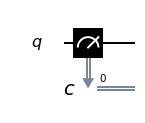

In [8]:
# Medida en z
qubit = QuantumCircuit(1,1)
qubit.measure(0,0)
qubit.draw(output='mpl')

Once we have defined a measurement over our circuit, we will have to *execute* the circuit. `Qiskit` allows us to do so with different backends, from simulators to real chips. The number of runs we execute a circuit is given by the variable `shots`. The more shots, the better our statistic. Let's do it first with a simulator:

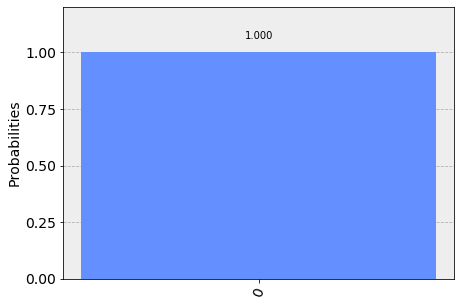

In [9]:
counts = execute(qubit,
                 Aer.get_backend('qasm_simulator'), shots = 1024).result().get_counts()
visualization.plot_histogram(counts)

Another feature of Qiskit is the possibility of adding diferent quantum gates to our circuit. There are many of them, but the ones we use the most are the Hadamard gate and the $X$ gate. To apply them, we just need to do:

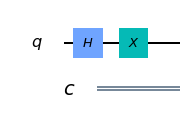

In [15]:
qubit = QuantumCircuit(1,1)
qubit.h(0) # Apply Hadamard gate
qubit.x(0) # Apply X gate

qubit.draw(output='mpl')

**Exercise:** Do you know what each of this gates do? Using the measurements of the circuits, find out what operation is the Hadamard gate doing.

## 2 - Multiple qubits

In the same way we have defined a circuit with one qubit, we can define many more:

In [23]:
two_qubit = QuantumCircuit(2, 2)

The principle is exactly the same as with single qubits. To apply gates, we need to define to which of the qubit we want the gates to be applied. For example:

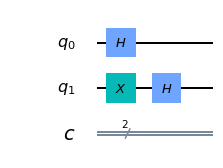

In [24]:
two_qubit.h(0)
two_qubit.x(1)
two_qubit.h(1)

two_qubit.draw(output='mpl')

In order to measure, we also need to specify which qubit goes to which classical register. Take into account that the order when looking at the counts is inversed, i.e. the value of the measure of the classical register 0 is the one on the right of the ouput.

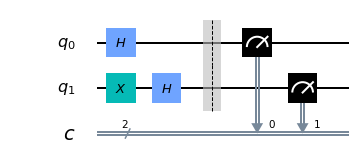

In [25]:
two_qubit.barrier()

two_qubit.measure(0, 0)
two_qubit.measure(1, 1)

two_qubit.draw(output='mpl')

**Exercise:** Measure the circuit to see its state.

## 3 - Other quantum gates

As said, there are many quantum gates we can apply to our circuits. [Here](https://quantum-computing.ibm.com/support/guides/gate-overview) you can find an overview of them. At the single qubit level, we have already seen the Hadamard gate and the $X$ gate. At the two qubit level, one of the most importan is the $CNOT$ gate, which rotates the target qubit if the control qubit is in state $|1\rangle$. You find it as `cx` in Qiskit:

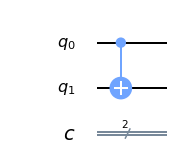

In [28]:
cnot = QuantumCircuit(2,2)

cnot.cx(0, 1)

cnot.draw(output = 'mpl')

**Exercise:** With the previous and the definition of the $CNOT$ we just gave, use the measurement to find out which qubit is the control and which the target. Remember that all states are initialized in $|0\rangle$ and that $X|0\rangle=|1\rangle$.

There exist a analog way of defining the circuit, by defining directly the quantum and classical registers with their given number of elements. As you we will see, this one is much more convinient:

In [39]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

circ = QuantumCircuit(q, c)

We will use this circuit to apply a three qubit gate, the *Toffoli gate*:

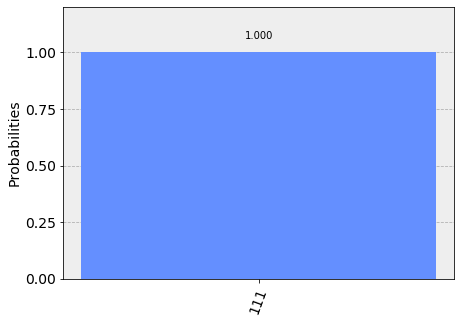

In [40]:
circ.x(q[0])
circ.x(q[1])
circ.ccx(q[0], q[1], q[2])

for idx in range(len(q)):
    circ.measure(q[idx], c[idx])    

counts = execute(circ,
                 Aer.get_backend('qasm_simulator')).result().get_counts()
visualization.plot_histogram(counts)

## 4 - Executing the circuits in Quantum chips

In the same way you have executed the circuits using the simulators, we can launch them in real quantum computers. To access them, you first need to register in the webpage [https://quantum-computing.ibm.com/](https://quantum-computing.ibm.com/). Once you have your user, you will be able to retrieve you Qiskit token. Now you are ready to use QPUs!

In [42]:
#IBMQ.save_account('YOUR_TOKEN')
IBMQ.load_account()
provider = IBMQ.get_provider() 

We can take a look at the various chips available using:

In [43]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

As we are not interest in any particular chip, it is recommended that you run your circuits in the least busy chip. To define a chip as you backend, you just need to use:

In [44]:
backend_lb = providers.ibmq.least_busy(provider.backends(simulator=False))
print("Least busy backend: ", backend_lb)

Least busy backend:  ibmq_burlington


To run the circuit in the chip, you just give to the execute function the backend you just defined:

In [ ]:
counts_QPU = execute(your_favourite_circuit,
                 backend = backend_lb).result().get_counts()

**Exercise:** Create a 2 qubit circuit and apply a Hadamard gate to each of the qubits. Then, measure the circuit using first the simulator and then the quantum chips. Are the both results equal? Why not?